# Show Image
MH, v1.2, 2022_02_28

## Init

In [4]:
# Change whether figures appear as a new window or in line.

# %matplotlib
%matplotlib inline

In [5]:
%config InlineBackend.figure_format = 'retina'

## Paths

In [6]:
from pathlib import Path

In [7]:
input_file = Path(
    'c:/Users/miros/home/work/jhi/projects/plasmonic_microscopy/teaching/' + 
    'data_analysis_python/images/image.tiff')

## Load Image

In [15]:
from skimage.io import imread

In [16]:
image = imread(input_file)

In [17]:
image

array([[468, 435, 341, ..., 565, 730, 388],
       [482, 454, 536, ..., 537, 428, 490],
       [459, 447, 532, ..., 491, 563, 429],
       ...,
       [486, 326, 295, ..., 406, 335, 447],
       [407, 406, 417, ..., 458, 314, 377],
       [261, 579, 238, ..., 250, 450, 359]], dtype=uint16)

## Show Image

### Matlab-style

In [19]:
import matplotlib.pyplot as plt

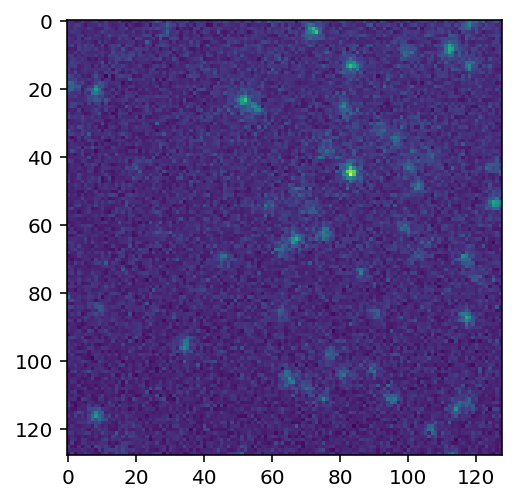

In [20]:
plt.imshow(image)
plt.show()

### Object Oriented-style

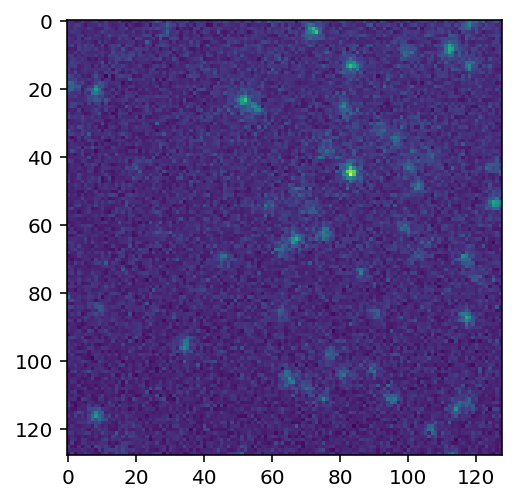

In [21]:
fig, ax = plt.subplots()
ax.imshow(image)
plt.show()

## Adjust Figure Size and Color Map 

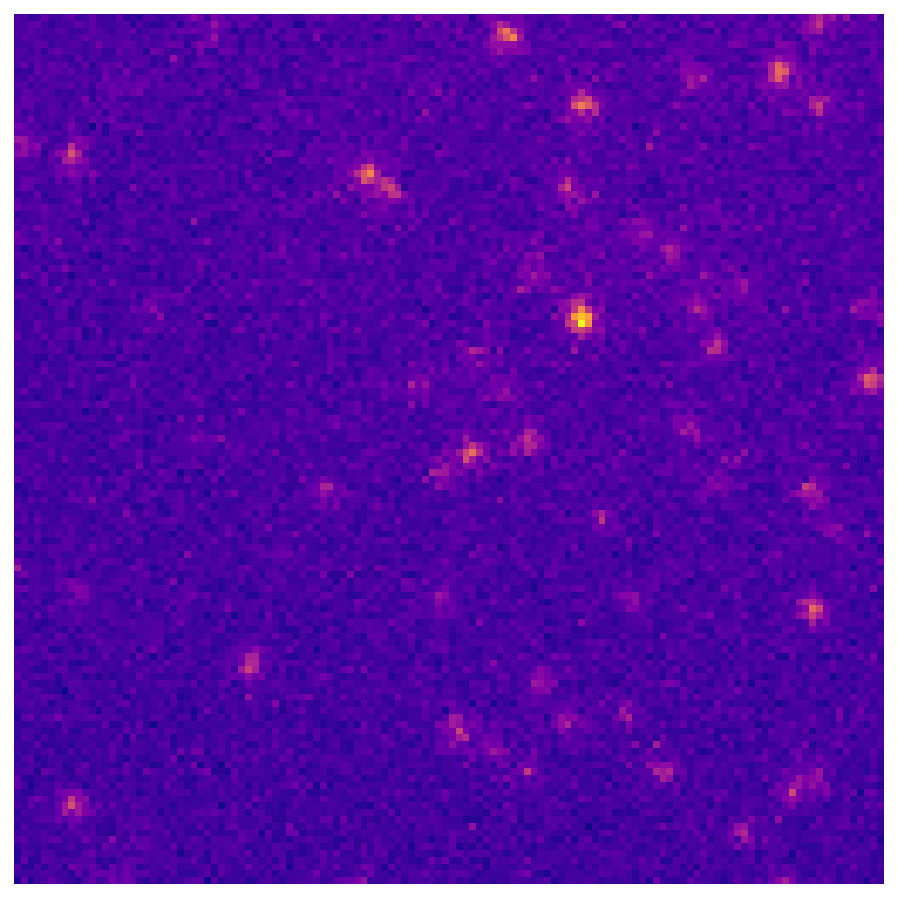

In [25]:
plt.figure(figsize=(8,8))
plt.imshow(image, cmap='plasma')
plt.axis('off')
plt.show()

## Set Plot Parameters Globally 

In [26]:
import matplotlib

matplotlib.rc('image', cmap='plasma')
matplotlib.rcParams['figure.figsize'] = (8,8)
matplotlib.rcParams['font.size'] = 12

## Title + Annotation

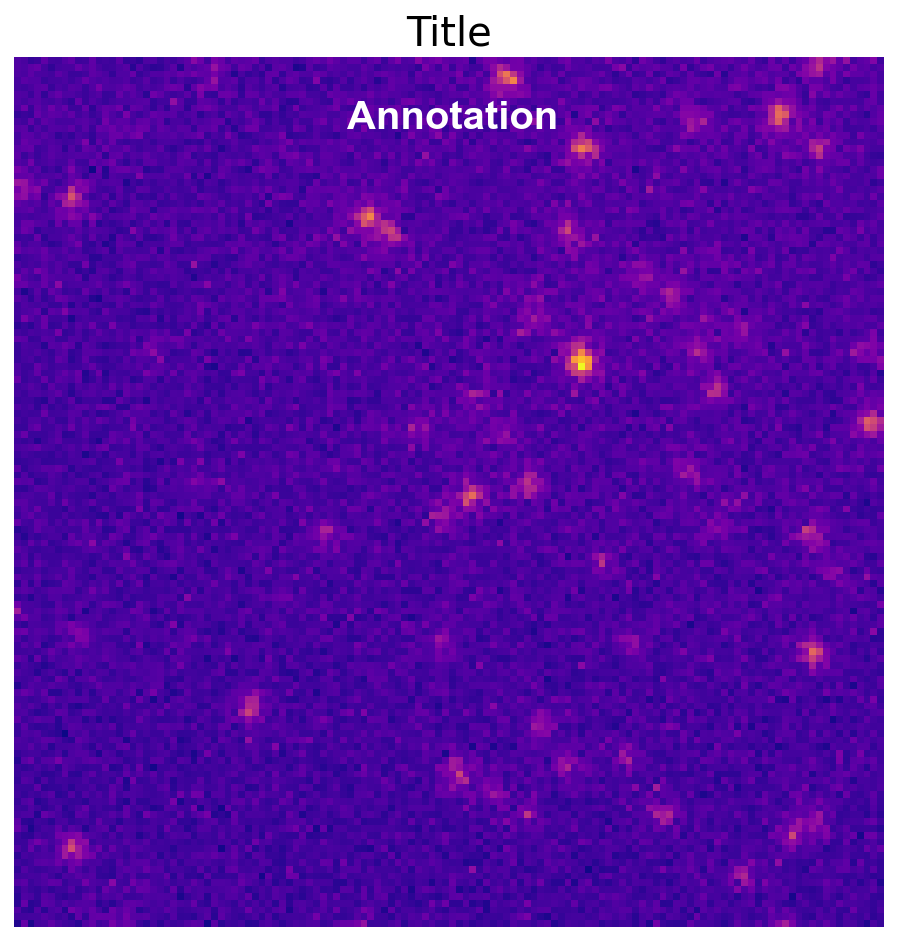

In [27]:
plt.title('Title', fontsize=20)
plt.text(image.shape[0]/2, 10, 'Annotation', horizontalalignment='center',
    fontname='Arial', fontsize=20, color='w', fontweight='bold')
plt.imshow(image)
plt.axis('off')
plt.show()

## Export Image

In [28]:
output_directory = input_file.parent

In [29]:
output_directory

WindowsPath('c:/Users/miros/home/work/jhi/projects/plasmonic_microscopy/teaching/data_analysis_python/images')

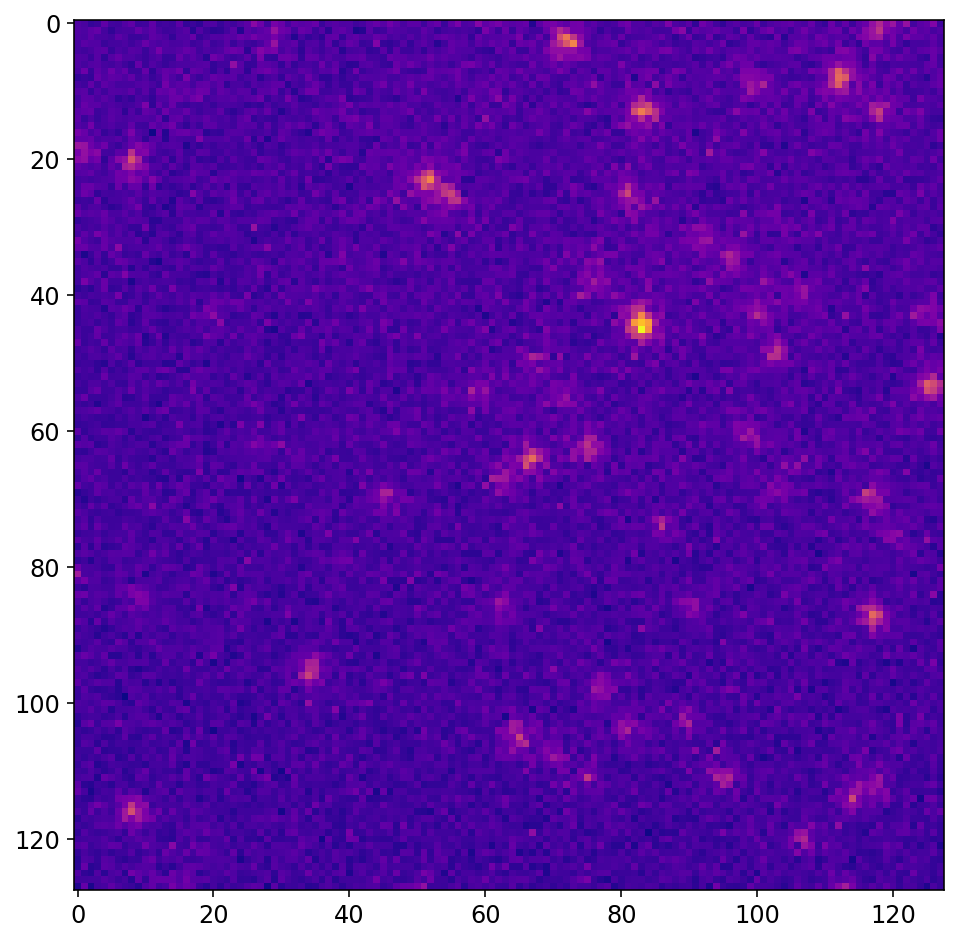

In [30]:
plt.figure()
plt.imshow(image)
plt.savefig(output_directory/'output.png', dpi=300, facecolor='w')
plt.savefig(output_directory/'output.pdf')
plt.show()

## Colorbar

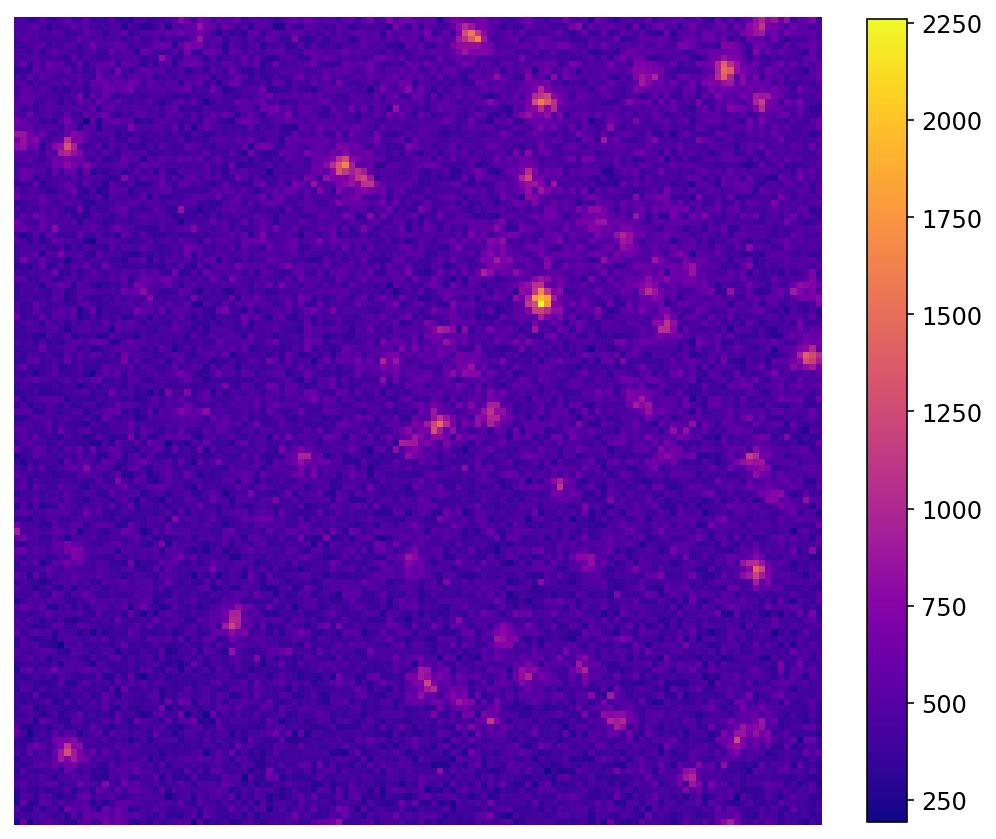

In [31]:
fig, ax = plt.subplots()
im = ax.imshow(image)
fig.colorbar(im, ax=ax, fraction=0.045)
ax.axis('off')
plt.show()

## Scalebar

In [32]:
pixelSize_nm = 100
scalebarWidth_nm = 1000
scalebarWidth = scalebarWidth_nm/pixelSize_nm

In [33]:
scalebarHeight = 4

In [34]:
scalebar_x0 = 5
scalebar_y0 = 5

In [35]:
scalebar_fontsize = 14

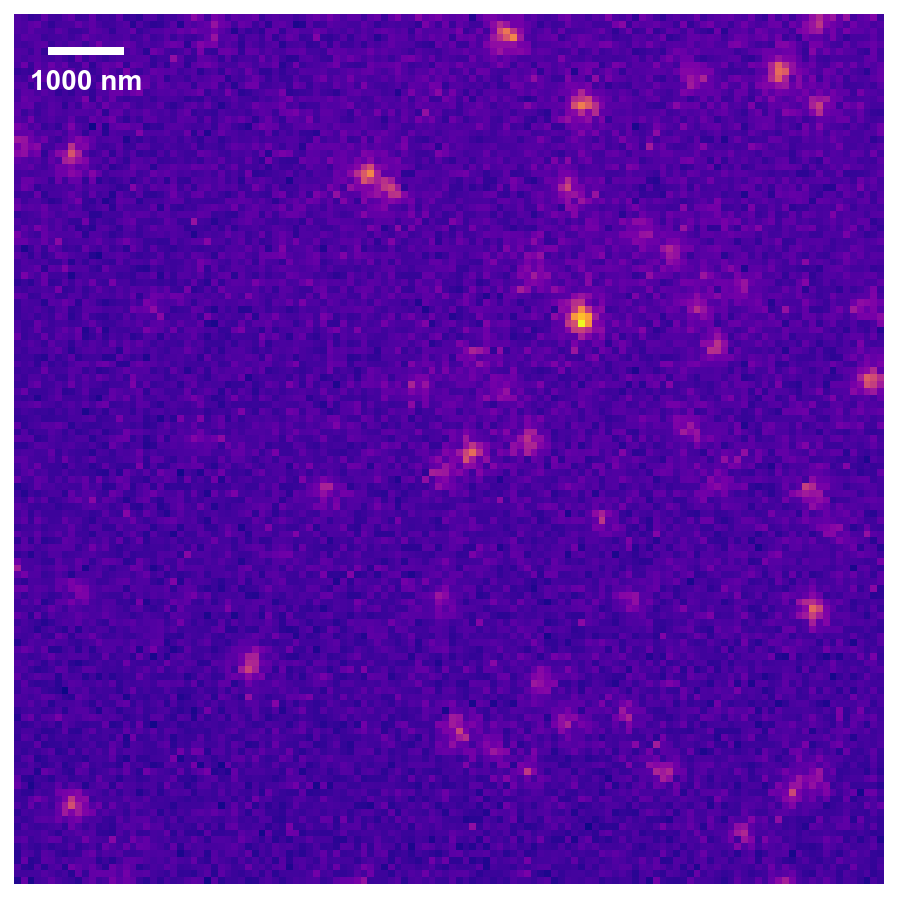

In [36]:
plt.imshow(image)
plt.plot(
    [scalebar_x0,scalebar_x0+scalebarWidth], 
    [scalebar_y0,scalebar_y0], 
    color="white", alpha=1, linewidth=scalebarHeight)

plt.text(scalebar_x0+scalebarWidth/2, scalebar_y0+scalebar_fontsize * 0.4, 
    f'{scalebarWidth_nm} nm', horizontalalignment='center', fontname='Arial',
    fontsize=scalebar_fontsize, color='w', fontweight='bold')

plt.axis('off')
plt.show()

## Zoom

In [37]:
zoom_x0 = 40
zoom_x1 = 50
zoom_y0 = 78
zoom_y1 = 88

In [38]:
zoom = image[zoom_x0:zoom_x1, zoom_y0:zoom_y1].copy()

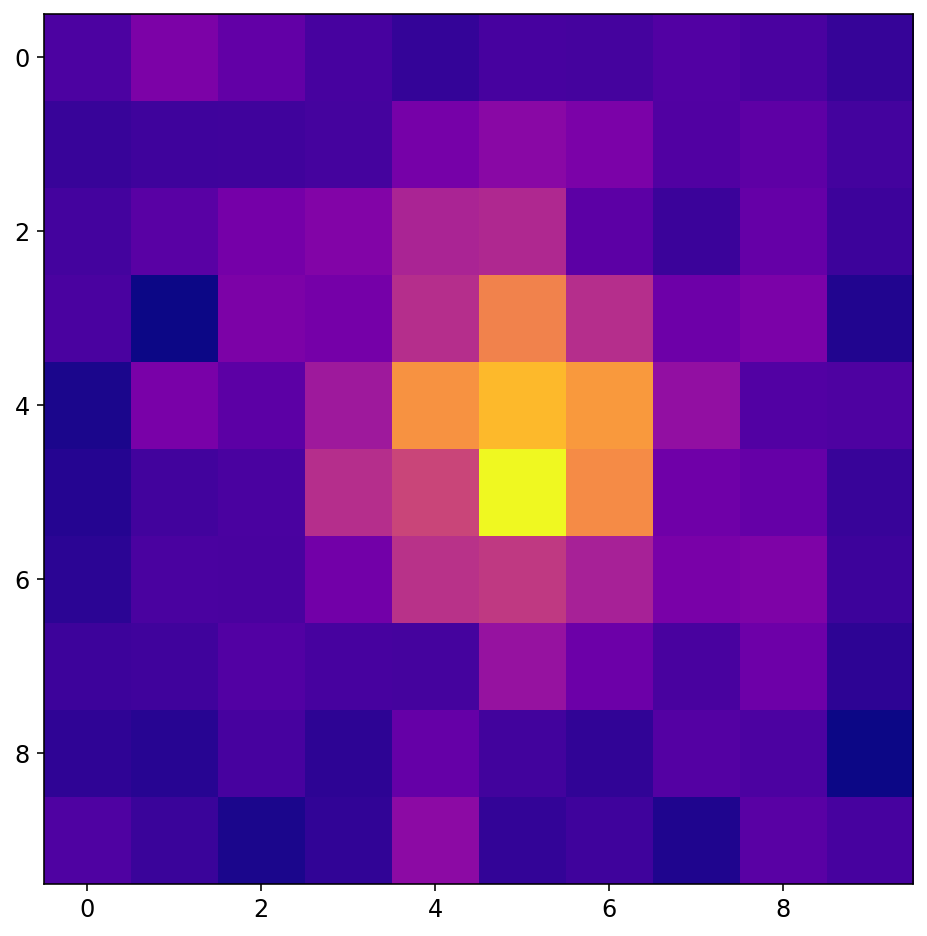

In [39]:
plt.imshow(zoom)
plt.show()

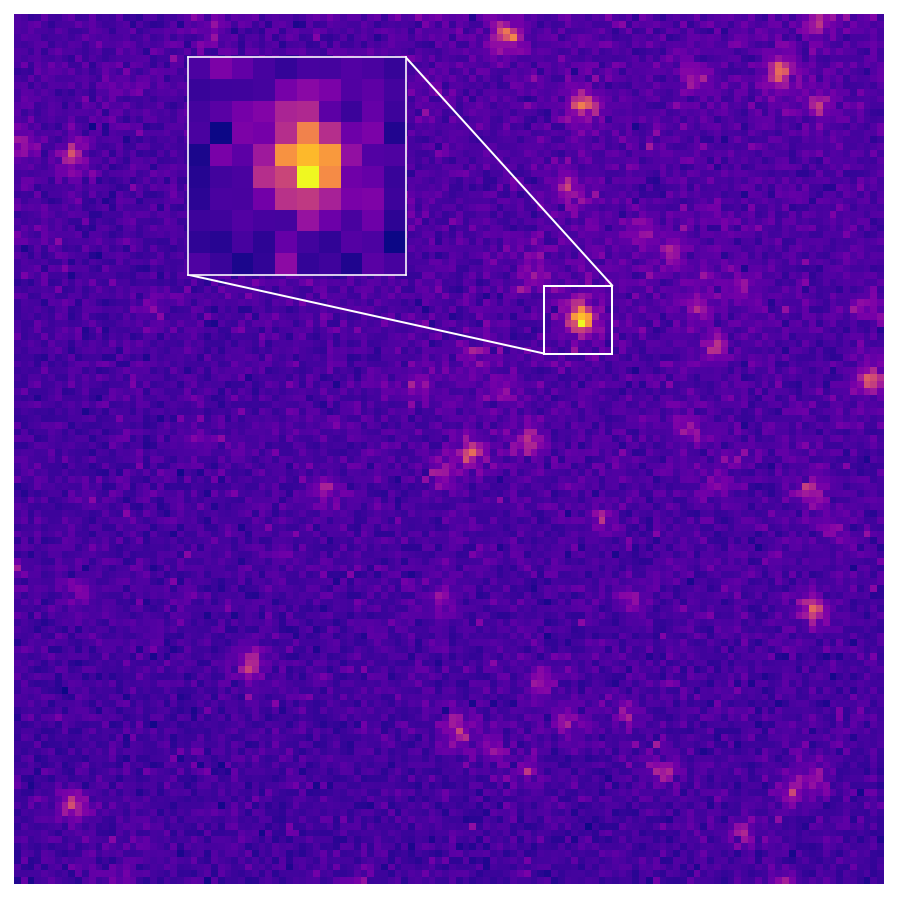

In [40]:
fig, ax = plt.subplots(figsize=[8,8])
ax.imshow(image)

axins = ax.inset_axes([0.2, 0.7, 0.25, 0.25])
axins.imshow(zoom, extent= (zoom_y0-0.5, zoom_y1-0.5, zoom_x0-0.5, zoom_x1-0.5), 
             cmap='plasma')

axins.set_xlim(zoom_y0-0.5, zoom_y1-0.5)
axins.set_ylim(zoom_x0-0.5, zoom_x1-0.5)

for spine in axins.spines.values():
    spine.set_edgecolor('w')
    
axins.set_xticks([])
axins.set_yticks([])

rectpatch, connects = ax.indicate_inset_zoom(axins, edgecolor='w', alpha=1)

connects[0].set_visible(True)
connects[1].set_visible(False)
connects[2].set_visible(False)
connects[3].set_visible(True)

ax.axis('off')
plt.show()